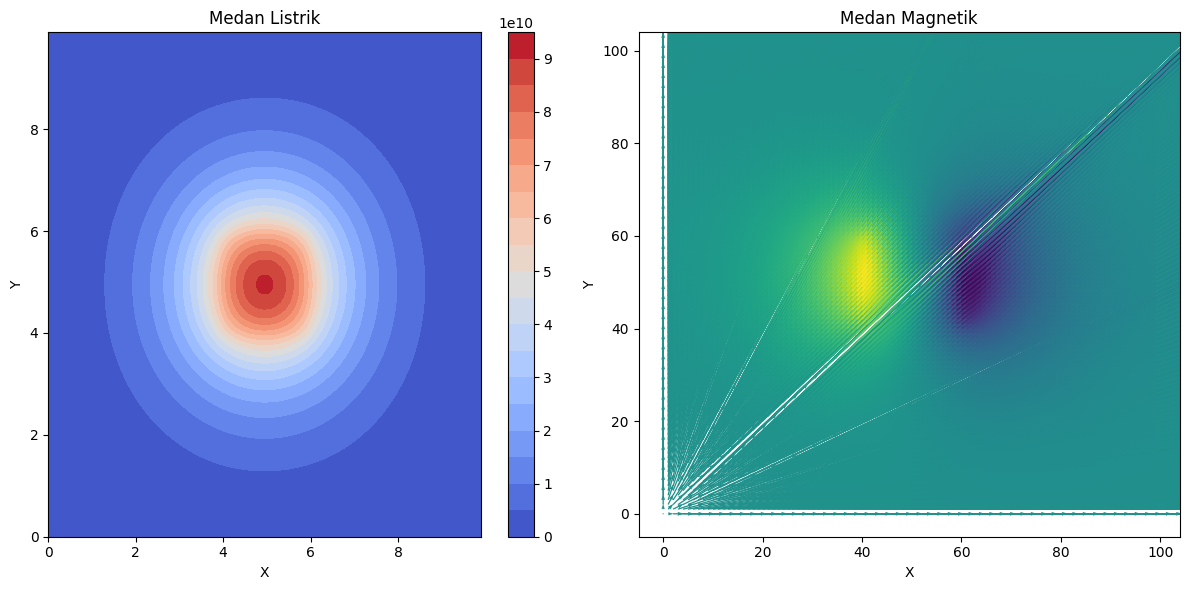

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Menentukan parameter konstan
epsilon0 = 8.854187817e-12  # Permittivity of free space
mu0 = 4 * np.pi * 1e-7  # Permeability of free space

# Menentukan dimensi grid dan ukuran langkah
nx = 100  # Jumlah titik grid di sumbu x
ny = 100  # Jumlah titik grid di sumbu y
dx = 0.1  # Ukuran langkah di sumbu x
dy = 0.1  # Ukuran langkah di sumbu y

# Menginisialisasi grid untuk medan listrik dan medan magnetik
electric_field = np.zeros((nx, ny))
magnetic_field = np.zeros((nx, ny))

# Menginisialisasi distribusi muatan
charge_density = np.zeros((nx, ny))
charge_density[40:60, 40:60] = 1.0  # Menempatkan muatan positif di tengah grid

# Mengiterasi hingga konvergensi
max_iterations = 1000
tolerance = 1e-6
electric_field_iterations = []
for iteration in range(max_iterations):
    # Menghitung medan listrik menggunakan metode Poisson
    next_electric_field = np.zeros((nx, ny))
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            next_electric_field[i, j] = (electric_field[i+1, j] + electric_field[i-1, j] +
                                        electric_field[i, j+1] + electric_field[i, j-1] +
                                        charge_density[i, j] / epsilon0 * dx**2) / 4

    # Menghitung selisih perubahan medan listrik
    electric_diff = np.abs(next_electric_field - electric_field)

    # Mengupdate medan listrik
    electric_field = next_electric_field

    # Menyimpan medan listrik pada setiap iterasi
    electric_field_iterations.append(electric_field.copy())

    # Menghentikan iterasi jika selisih perubahan sudah cukup kecil
    if np.max(electric_diff) < tolerance:
        break

# Menghitung medan magnetik menggunakan persamaan Maxwell
for i in range(1, nx - 1):
    for j in range(1, ny - 1):
        magnetic_field[i, j] = (electric_field[i, j+1] - electric_field[i, j-1]) / (2 * dy)

# Membuat grid untuk plotting
x = np.linspace(0, (nx - 1) * dx, nx)
y = np.linspace(0, (ny - 1) * dy, ny)
X, Y = np.meshgrid(x, y)

# Inisialisasi plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot medan listrik
cf1 = ax1.contourf(X, Y, electric_field, levels=20, cmap='coolwarm')
ax1.set_title('Medan Listrik')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
plt.colorbar(cf1, ax=ax1)

# Plot medan magnetik
scale = 10  # Scale factor for the quiver plot
ax2.quiver(X, Y, magnetic_field, scale=scale, color='b')
ax2.set_title('Medan Magnetik')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

plt.tight_layout()

plt.show()
